## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0717 22:56:57.103134 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 22:56:57.128623 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 22:56:57.132455 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0717 22:56:59.458066 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 22:56:59.466174 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0717 22:57:09.979464 139620787275584 deprecation.py:323] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 22:57:10.057004 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.9328 - acc: 0.2990 - val_loss: 1.7631 - val_acc: 0.3612
Epoch 2/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.7057 - acc: 0.3872 - val_loss: 1.6832 - val_acc: 0.3994
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6199 - acc: 0.4249 - val_loss: 1.5870 - val_acc: 0.4362
Epoch 4/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.5479 - acc: 0.4481 - val_loss: 1.5073 - val_acc: 0.4601
Epoch 5/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5014 - acc: 0.4666 - val_loss: 1.5097 - val_acc: 0.4606
Epoch 6/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4626 - acc: 0.4793 - val_loss: 1.4708 - val_acc: 0.4787
Epoch 7/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4278 - acc: 0.4907 - val_loss: 1.4539 -

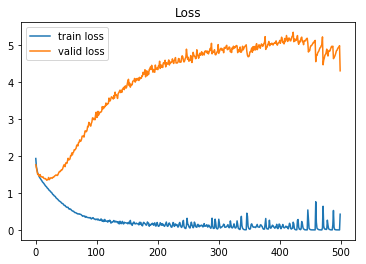

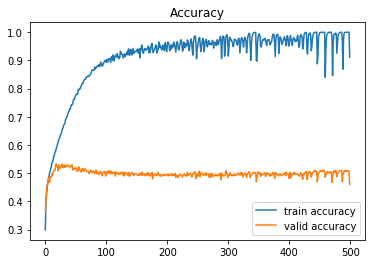

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [9]:
optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.3339 - acc: 0.9022 - val_loss: 4.2641 - val_acc: 0.4903
Epoch 2/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.1186 - acc: 0.9622 - val_loss: 4.3528 - val_acc: 0.4937
Epoch 3/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.0716 - acc: 0.9787 - val_loss: 4.4063 - val_acc: 0.4958
Epoch 4/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.0495 - acc: 0.9873 - val_loss: 4.4633 - val_acc: 0.4960
Epoch 5/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.0374 - acc: 0.9916 - val_loss: 4.4985 - val_acc: 0.4983
Epoch 6/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.0299 - acc: 0.9945 - val_loss: 4.5397 - val_acc: 0.4983
Epoch 7/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.0249 - acc: 0.9959 - val_loss: 4.5630 - 

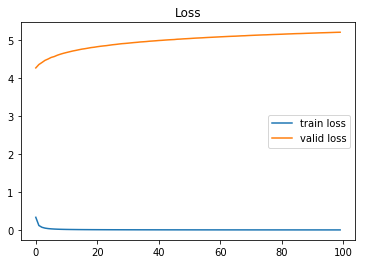

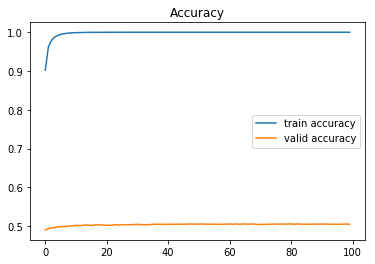

In [10]:
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()